# Clustering

In [1]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#importar dados principais
df = pd.read_csv('Dados\data.csv')

In [3]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,morador,numero_controle,bloco,bloco_classificacao,dt_visita,dt_termino,tempo_total_entrev,...,escolaridade,estado_civil,faixa_renda,int_renda,nivel_gastos,categoria_escolaridade,categoria_transporte,categoria_hospedagem,categoria_regiao,faixa_etaria
0,0,0,0,Morador,1,Tchanzinho Zona Norte,Outros,2018-02-09 17:39:00,2018-02-09 17:47:00,0 days 00:08:27,...,Ensino superior completo,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3,Baixo,Graduado,NaN,Outros,Sudeste,Adulto
1,1,1,1,Morador,2,Tchanzinho Zona Norte,Outros,2018-02-09 17:39:00,2018-02-09 17:51:00,0 days 00:11:21,...,Pos – Graduaçao – Mestrado,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",5,Baixo,Pós,NaN,Outros,Sudeste,Adulto
2,2,2,2,Morador,3,Tchanzinho Zona Norte,Outros,2018-02-09 17:40:00,2018-02-09 17:52:00,0 days 00:11:43,...,Ensino superior incompleto,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6,Baixo,Graduado,NaN,Outros,Sudeste,Jovem adulto
3,3,3,3,Morador,4,Tchanzinho Zona Norte,Outros,2018-02-09 17:43:00,2018-02-09 17:55:00,0 days 00:12:39,...,Ensino superior completo,Casado (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",7,Baixo,Graduado,NaN,Outros,Sudeste,Meia-idade
4,4,4,4,Morador,5,Tchanzinho Zona Norte,Outros,2018-02-09 17:49:00,2018-02-09 17:58:00,0 days 00:08:49,...,Ensino medio completo,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6,Baixo,Ensino Básico,NaN,Outros,Sudeste,Meia-idade


In [4]:
df.tail()

,Unnamed: 0.1,index,Unnamed: 0,morador,numero_controle,bloco,bloco_classificacao,dt_visita,dt_termino,tempo_total_entrev,...,escolaridade,estado_civil,faixa_renda,int_renda,nivel_gastos,categoria_escolaridade,categoria_transporte,categoria_hospedagem,categoria_regiao,faixa_etaria
1576,1576,1640,1640,Morador,1641,Bloco Despedida de Carnaval,Bloco Despedida de Carnaval,2018-02-14 00:00:00,2018-02-15 11:26:00,0 days 00:03:53,...,Ensino tecnico,Solteiro (a),"De 1 a 2 salários (R$ 954,00 - R$ 1.908,00)",2,Baixo,Graduado,NaN,Outros,Sudeste,Jovem adulto
1577,1577,1641,1641,Morador,1642,Bloco Despedida de Carnaval,Bloco Despedida de Carnaval,2018-02-14 00:00:00,2018-02-15 11:30:00,0 days 00:03:59,...,Ensino superior completo,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3,Baixo,Graduado,NaN,Outros,Sudeste,Adulto
1578,1578,1642,1642,Morador,1643,Bloco Despedida de Carnaval,Bloco Despedida de Carnaval,2018-02-14 00:00:00,2018-02-15 11:37:00,0 days 00:03:46,...,Ensino medio completo,Casado (a),"De 1 a 2 salários (R$ 954,00 - R$ 1.908,00)",2,Baixo,Ensino Básico,NaN,Outros,Sudeste,Adulto
1579,1579,1643,1643,Morador,1644,Bloco Despedida de Carnaval,Bloco Despedida de Carnaval,2018-02-14 00:00:00,2018-02-15 11:42:00,0 days 00:04:19,...,Pos – Graduaçao – Especializaçao,Solteiro (a),"Acima de 8 salários (acima de R$ 7.632,00)",11,Alto,Pós,NaN,Outros,Sudeste,Meia-idade
1580,1580,1644,1644,Visitantes,1645,Bloco Despedida de Carnaval,Bloco Despedida de Carnaval,2018-02-14 00:00:00,2018-02-15 11:47:00,0 days 00:04:00,...,Ensino superior incompleto,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3,Baixo,Graduado,Transporte Coletivo,Casa,Sudeste,Jovem adulto


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                1581 non-null   int64  
 1   index                       1581 non-null   int64  
 2   Unnamed: 0                  1581 non-null   int64  
 3   morador                     1581 non-null   object 
 4   numero_controle             1581 non-null   int64  
 5   bloco                       1581 non-null   object 
 6   bloco_classificacao         1581 non-null   object 
 7   dt_visita                   1581 non-null   object 
 8   dt_termino                  1581 non-null   object 
 9   tempo_total_entrev          1581 non-null   object 
 10  idade                       1581 non-null   int64  
 11  pais                        1581 non-null   object 
 12  estado                      1581 non-null   object 
 13  cidade                      1581 

In [6]:
#retirar colunas que nao incluem informação a priori do visitante (incluindo o que ele fez na cidade)
#np.r_ concatena as slices
df = df.iloc[:,np.r_[3,10:14,34,55:60]]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   morador                     1581 non-null   object
 1   idade                       1581 non-null   int64 
 2   pais                        1581 non-null   object
 3   estado                      1581 non-null   object
 4   cidade                      1581 non-null   object
 5   participou_anos_anteriores  1581 non-null   object
 6   genero                      1581 non-null   object
 7   escolaridade                1581 non-null   object
 8   estado_civil                1581 non-null   object
 9   faixa_renda                 1581 non-null   object
 10  int_renda                   1581 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 136.0+ KB


Df bem mais simples, só com dados prévios, sem entradas nulas. 

In [8]:
#ver aspecto
df.head()

,morador,idade,pais,estado,cidade,participou_anos_anteriores,genero,escolaridade,estado_civil,faixa_renda,int_renda
0,Morador,25,Brasil,Minas Gerais,Vespasiano,Sim,Feminino,Ensino superior completo,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3
1,Morador,32,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",5
2,Morador,18,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino superior incompleto,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6
3,Morador,40,Brasil,Minas Gerais,Belo Horizonte,Nao,Feminino,Ensino superior completo,Casado (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",7
4,Morador,47,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6


In [9]:
#int_renda é o mesmo que faixa_renda
df = df.drop(['faixa_renda'], axis=1)

In [10]:
#combinar colunas pais, estado e cidade para 'origem' - menos colunas melhor com menos variaveis para OHE, melhor
df['origem'] = 'vazio'
for i in range(len(df)):
    if df.loc[i,'pais'] != 'Brasil':
        df.loc[i,'origem'] = 'estrangeiro'
    elif df.loc[i,'estado'] != 'Minas Gerais':
        df.loc[i,'origem'] = 'brasileiro'
    elif df.loc[i,'cidade'] != 'Belo Horizonte':
        df.loc[i,'origem'] = 'mineiro'
    else:
        df.loc[i,'origem'] = 'belo-horizontino'
df.head(15)

,morador,idade,pais,estado,cidade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem
0,Morador,25,Brasil,Minas Gerais,Vespasiano,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro
1,Morador,32,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino
2,Morador,18,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino
3,Morador,40,Brasil,Minas Gerais,Belo Horizonte,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino
4,Morador,47,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino
5,Morador,23,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino superior incompleto,Solteiro (a),11,belo-horizontino
6,Morador,16,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino fundamental incompleto,Solteiro (a),2,belo-horizontino
7,Morador,58,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Casado (a),3,belo-horizontino
8,Morador,65,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino superior completo,Solteiro (a),4,belo-horizontino
9,Morador,25,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Outro,5,belo-horizontino


Agora morador	pais	estado	cidade  tornaram-se redundantes.

In [11]:
#apagar colunas redundantes
df = df.drop(['morador','pais','estado','cidade'], axis=1)

In [12]:
df.head()

,idade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem
0,25,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro
1,32,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino
2,18,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino
3,40,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino
4,47,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino


In [13]:
#OHE para categoricas
df_transformed = pd.get_dummies(df)

In [14]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   idade                                          1581 non-null   int64
 1   int_renda                                      1581 non-null   int64
 2   participou_anos_anteriores_Nao                 1581 non-null   uint8
 3   participou_anos_anteriores_Sim                 1581 non-null   uint8
 4   genero_Feminino                                1581 non-null   uint8
 5   genero_Masculino                               1581 non-null   uint8
 6   escolaridade_Ensino fundamental completo       1581 non-null   uint8
 7   escolaridade_Ensino fundamental incompleto     1581 non-null   uint8
 8   escolaridade_Ensino medio completo             1581 non-null   uint8
 9   escolaridade_Ensino medio incompleto           1581 non-null   uint8
 10  

df pronto, sem valores nulos

In [16]:
#escalonar dados numéricos
scaler = StandardScaler()
df_transformed[['idade','int_renda']] = scaler.fit_transform(df_transformed[['idade','int_renda']])

In [18]:
#determinar numero de clusters otimo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
#soma dos square means para cada cluster
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_transformed)
    sse.append(kmeans.inertia_)

C:\Users\nihon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


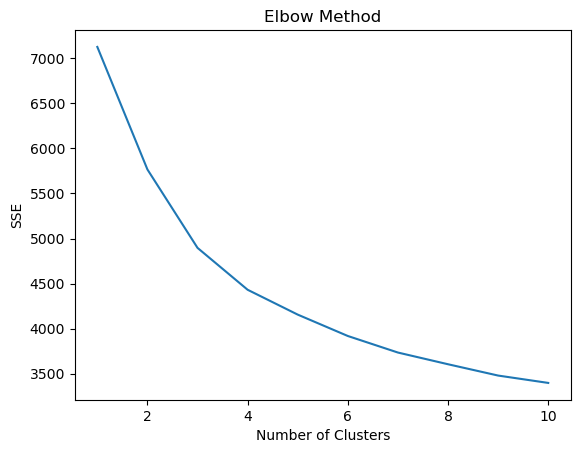

In [19]:
#vizualizar SSE para cada numero de clusters
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Cotovelo na curva para 3 clusters.

Vamos de 3 grupos que traz um equilibrio entre o SSE e o número de grupos.

In [20]:
#fazer clusterização pelo método mais comum de kmeans
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(df_transformed)

KMeans(init='random', n_clusters=3, random_state=42)

In [21]:
#atribuir cada entrada ao seu cluster 
df["cluster"] = kmeans.labels_
df_transformed["cluster"] = kmeans.labels_

In [22]:
# reduzir a dimensionalidade dos dados a 2 por principal component analysis, para se visualizar no gráfico cartesiano
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_transformed)

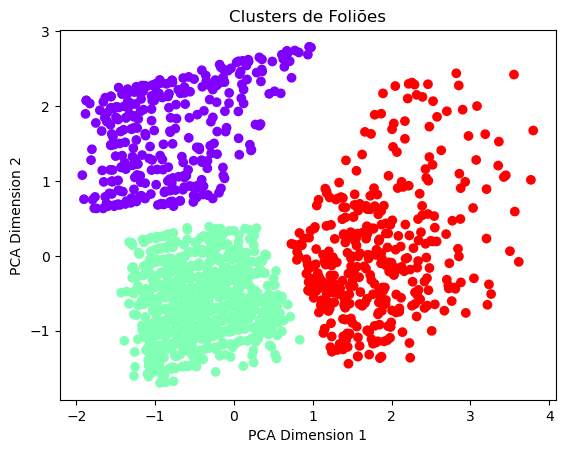

In [23]:
#plotar clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title("Clusters de Foliões")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

In [24]:
df

,idade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem,cluster
0,25,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro,1
1,32,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino,1
2,18,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino,1
3,40,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino,2
4,47,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino,2
...,...,...,...,...,...,...,...,...
1576,18,Sim,Feminino,Ensino tecnico,Solteiro (a),2,belo-horizontino,1
1577,31,Sim,Masculino,Ensino superior completo,Solteiro (a),3,belo-horizontino,1
1578,30,Nao,Feminino,Ensino medio completo,Casado (a),2,mineiro,1
1579,47,Sim,Masculino,Pos – Graduaçao – Especializaçao,Solteiro (a),11,belo-horizontino,0


In [26]:
df.groupby('cluster').agg(['median', 'count'])

C:\Users\nihon\AppData\Local\Temp\ipykernel_1832\1842638227.py:1: FutureWarning: ['participou_anos_anteriores', 'genero', 'escolaridade', 'estado_civil', 'origem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('cluster').agg(['median', 'count'])


idade       int_renda      
        median count    median count
cluster                             
0         26.0   329      10.0   329
1         24.0   885       3.0   885
2         46.0   367       5.0   367

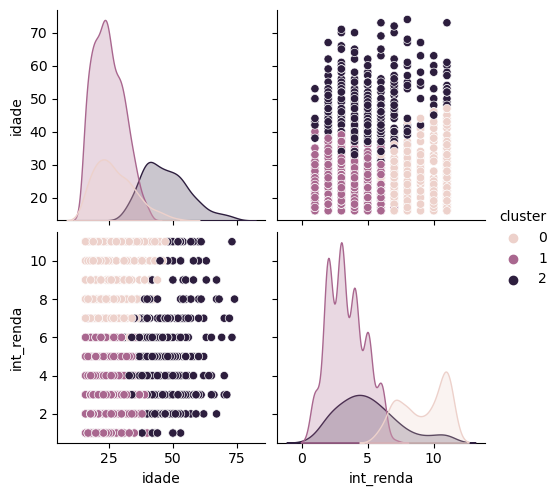

In [27]:
#plotar varias dependencias
sns.pairplot(df, hue="cluster")

In [32]:
df_transformed.columns

Index(['idade', 'int_renda', 'participou_anos_anteriores_Nao',
       'participou_anos_anteriores_Sim', 'genero_Feminino', 'genero_Masculino',
       'escolaridade_Ensino fundamental completo',
       'escolaridade_Ensino fundamental incompleto',
       'escolaridade_Ensino medio completo',
       'escolaridade_Ensino medio incompleto',
       'escolaridade_Ensino superior completo',
       'escolaridade_Ensino superior incompleto',
       'escolaridade_Ensino tecnico', 'escolaridade_Nao respondeu',
       'escolaridade_Pos – Graduaçao – Doutorado',
       'escolaridade_Pos – Graduaçao – Especializaçao',
       'escolaridade_Pos – Graduaçao – Mestrado', 'estado_civil_Casado (a)',
       'estado_civil_Divorciado (a)', 'estado_civil_Outro',
       'estado_civil_Solteiro (a)', 'estado_civil_Viuvo (a)',
       'origem_belo-horizontino', 'origem_brasileiro', 'origem_estrangeiro',
       'origem_mineiro', 'cluster'],
      dtype='object')

In [28]:
#Regressão logística, multimodal (para 5 possíveis valores de target)
#divisão em features e target
features = df_transformed.drop(['cluster'], axis=1)
target = df_transformed['cluster']

train_features, valid_features, train_target, valid_target = train_test_split(
    features, target, test_size=0.25, random_state=12345)

logregr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logregr_model.fit(train_features, train_target)

valid_predictions = logregr_model.predict(valid_features)
train_predictions = logregr_model.predict(train_features)

valid_accuracy = accuracy_score(valid_target, valid_predictions)
train_accuracy = accuracy_score(train_target, train_predictions)


print("Acurácia do modelo:", valid_accuracy)
print("Acurácia do treino:", train_accuracy)

Acurácia do modelo: 0.9873737373737373
Acurácia do treino: 0.9957805907172996


Excelente acurácia indica um bom clustering.

In [29]:
#Extrair os coeficientes do modelo
coef = logregr_model.coef_

# Print the coefficients for each feature
for i, col in enumerate(df.columns):
    print(col, coef[0][i])

idade -1.7041120713276883
participou_anos_anteriores 4.707778779705785
genero 0.1584065568640536
escolaridade -0.15986644832168984
estado_civil -0.5009557447749612
int_renda 0.49949585331732493
origem 0.1638966654332193
cluster 0.051337987623739076


As features mais importantes parecem ter sido:
- participou_anos_anteriores (4.707778779705785)
- idade (-1.7041120713276883)
- estado_civil (-0.5009557447749612)
- int_renda (0.49949585331732493)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   idade                       1581 non-null   int64 
 1   participou_anos_anteriores  1581 non-null   object
 2   genero                      1581 non-null   object
 3   escolaridade                1581 non-null   object
 4   estado_civil                1581 non-null   object
 5   int_renda                   1581 non-null   int64 
 6   origem                      1581 non-null   object
 7   cluster                     1581 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 92.8+ KB


In [43]:
df['anos_anteriores'] = 0
for row in range(len(df)):
    if df['participou_anos_anteriores'][row] == 'Sim':
        df['anos_anteriores'][row] = 1
    if df['participou_anos_anteriores'][row] == 'Nao':
        df['anos_anteriores'][row] = 0
df = df.drop('participou_anos_anteriores', axis=1)
df.head()

C:\Users\nihon\AppData\Local\Temp\ipykernel_1832\3567541950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anos_anteriores'][row] = 1
C:\Users\nihon\AppData\Local\Temp\ipykernel_1832\3567541950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anos_anteriores'][row] = 0


,idade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem,cluster,anos_anteriores
0,25,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro,1,1
1,32,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino,1,1
2,18,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino,1,1
3,40,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino,2,0
4,47,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino,2,1


<AxesSubplot:xlabel='cluster'>

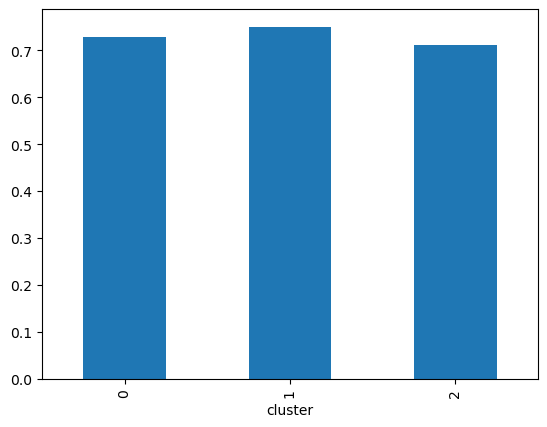

In [47]:
#anos anteriores
df.groupby('cluster')['anos_anteriores'].mean().plot(kind='bar')

'participou_anos_anteriores' **não** é relevante.

<AxesSubplot:xlabel='cluster'>

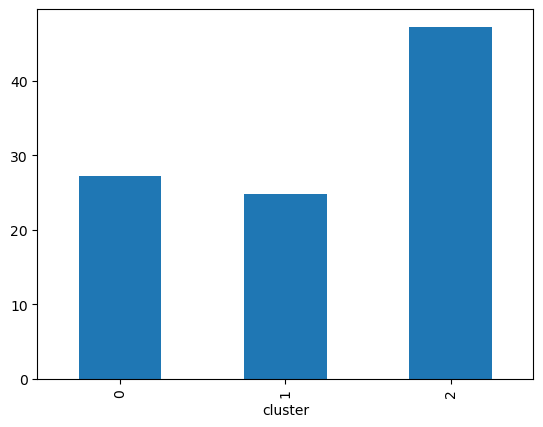

In [48]:
#idade
df.groupby('cluster')['idade'].mean().plot(kind='bar')

In [57]:
df.groupby('cluster')['idade'].mean()

cluster
0    27.227964
1    24.842938
2    47.264305
Name: idade, dtype: float64

**Grupo 2 mais velho.**

In [51]:
#estado civil

# agrupar por cluster and estado_civil
grouped = df.groupby(['cluster', 'estado_civil'])

# clacular total de cada estado_civil em cada cluster
counts = grouped['estado_civil'].count()

# calcular totais de cada cluster
totals = df.groupby('cluster')['estado_civil'].count()

# Calcular percentagem de cada estado_civil em cada
percentages = counts.div(totals, level='cluster') * 100

# Print the percentages
print(percentages)

cluster  estado_civil  
0        Casado (a)        17.629179
         Divorciado (a)     3.343465
         Outro              0.911854
         Solteiro (a)      78.115502
1        Casado (a)         5.988701
         Divorciado (a)     1.807910
         Outro              0.903955
         Solteiro (a)      91.073446
         Viuvo (a)          0.225989
2        Casado (a)        53.950954
         Divorciado (a)    12.261580
         Solteiro (a)      30.245232
         Viuvo (a)          3.542234
Name: estado_civil, dtype: float64



- Cluster 0: solteiros
- Cluster 1: solteiros
- Cluster 2: casados

<AxesSubplot:xlabel='cluster'>

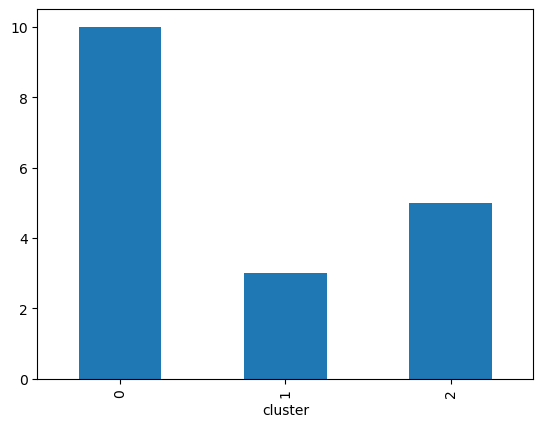

In [55]:
df.groupby('cluster')['int_renda'].median().plot(kind='bar')

**Cluster 0: renda mais alta (classe 10)**

# Resumo

### Três clusters

Cluster 0:
- até 40 anos (média, próximo de 25 anos)
- renda classe 6 para cima (mediana classe 10)
- solteiros

Cluster 1:
- também até 40 anos (média, próximo de 25 anos)
- renda ABAIXO de classe 6 (mediana classe 3)
- solteiros

Cluster 2:
- acima de 40 anos (média 47 anos)
- de todas as rendas
- casados
